In [1]:
import pandas as pd
import numpy as np
posts = pd.read_csv('posts_count_me.csv.gz', compression='gzip', error_bad_lines=False)
posts = posts[pd.isnull(posts['labels']) == False]
len(posts)

178060

In [2]:
from liwc import LIWC
liwc_class = LIWC()

In [3]:
def buildPolarity(x): 
    try:
        texts = []
        texts.append(x['content'])
        mtx = liwc_class.build_features(texts)
        return mtx[0][27] + mtx[0][28]
    except:
        return 0

posts['polarity'] = posts.apply(buildPolarity,axis=1)

In [4]:
posts.to_csv('posts_count_me_pol.csv.gz', compression='gzip')

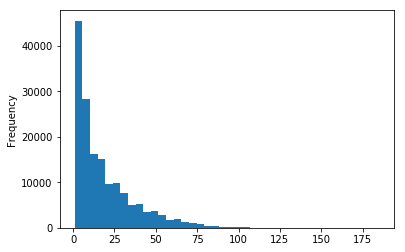

In [5]:
%matplotlib inline
polHist = posts['polarity']
polHist = polHist[polHist > 0]
polHist = polHist[polHist < 300]
polHist.plot.hist(bins=40)

In [6]:
len(polHist)

161017

In [7]:
np.mean(polHist)

18.518640888850246

In [8]:
np.std(polHist)

18.581631648462473